# Lending Club Data Analysis
  1. Data Understanding
  2. Data Cleaning
  3. Data Pre-processing
  4. Plotting

### Loading Data

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',50)


# Importing the Lending Club CSV File

In [3]:
loan_file = pd.read_csv(r"Lending club case study/loan.csv",engine='python')

# Checking the encoding of the file

In [4]:
import chardet
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns',60)

In [5]:
path = r"Lending club case study/loan.csv"
# Opening and reading file to get desired result 

with open(path,'rb') as rawdata :
    res = chardet.detect(rawdata.read(55000))
print(res)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


# Storing the length of the Lending data file

In [6]:
loan_file
init_len = len(loan_file.index)

# Data Exploration
# Checking Lending data values

In [7]:
loan_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
loan_file.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,...,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,nan,1.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,nan,0.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,nan,1.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,52.00,104.00,12.00,0.00,17058.00,29.00,0.00,0.00,16534.43,15798.81,13653.26,2833.40,0.00,0.00,0.00,3293.16,0.00,nan,1.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,120.00,129.00,44.00,4.00,149588.00,90.00,6311.47,6307.37,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,0.00,nan,1.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.00,0.00,nan,nan,nan,nan


In [9]:
loan_file.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


# Checking null values percentage

In [10]:
loan_file.isnull().mean()*100

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

# Getting columns that are having null values greater than 60%

In [11]:
col_nan_list = []
for col in loan_file.columns:
    if loan_file[''+col+''].isnull().mean()*100>60:
        col_nan_list.append(col)
len(col_nan_list  )      

57

# Dropping the columns with more than 60% null values

In [12]:
loan_file = loan_file.drop(col_nan_list,axis=1)
loan_file.shape

(39717, 54)

# Rechecking null values percentage after droping columns

In [13]:
loan_file.isnull().mean()*100

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc            

In [14]:
loan_file.shape

(39717, 54)

# Removing columns that are not useful in analysis as per business rules

In [15]:
col_to_drop = ['emp_title','title','collections_12_mths_ex_med','inq_last_6mths',
               'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','member_id','tax_liens',
              'application_type','policy_code','initial_list_status','zip_code','funded_amnt','pymnt_plan','url','desc']

In [16]:
loan_file = loan_file.drop(col_to_drop,axis=1)
loan_file.shape

(39717, 37)

In [17]:
loan_file.isnull().mean()*100

id                        0.00
loan_amnt                 0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_length                2.71
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
purpose                   0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.13
total_acc                 0.00
out_prncp                 0.00
out_prncp_inv             0.00
total_pymnt               0.00
total_pymnt_inv           0.00
total_rec_prncp           0.00
total_rec_int             0.00
total_rec_late_fee        0.00
recoveries                0.00
collecti

# Droping rows that are having less than 2% null values

In [18]:
loan_file = loan_file[~ pd.isnull(loan_file['last_pymnt_d'])]
loan_file = loan_file[~ pd.isnull(loan_file['revol_util'])]
loan_file = loan_file[~ pd.isnull(loan_file['pub_rec_bankruptcies'])]
loan_file = loan_file[~ pd.isnull(loan_file['emp_length'])]
loan_file = loan_file[~ pd.isnull(loan_file['last_credit_pull_d'])]



In [19]:
#Checking for overall null values present in Lending Club dataset.
loan_file.isnull().sum().sum()

0

In [20]:
print(loan_file.shape,"\n")

#Checking the amount of data in percentage left after removing null values
print((len(loan_file.index)/init_len)*100)

(37835, 37) 

95.2614749351663


# Converting Objects columns to numericals

In [21]:
loan_file.head(2)

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,4975.00,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,2500,2500.00,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00


# Converting term column to numerical

In [22]:
loan_file['term'] = loan_file.term.apply(lambda x:x.split("months")[0] )
loan_file.term = loan_file.term.astype('float')
loan_file.head(2)

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,4975.00,36.00,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,2500,2500.00,60.00,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00


In [23]:
print(len(loan_file.loc[((loan_file.term == "")), : ]))

0


C:\Users\Rahul\anaconda3\envs\tensor\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


# Converting int_rate column to numerical

In [24]:
loan_file['int_rate'] = loan_file.int_rate.apply(lambda x:x.split("%")[0] )
loan_file.int_rate = loan_file.int_rate.astype('float')
loan_file.head(2)

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,4975.00,36.00,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,2500,2500.00,60.00,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00


# Converting emp_length column to numeric

In [25]:
loan_file['emp_length'] = loan_file.emp_length.str.rstrip(" years")
loan_file.emp_length = loan_file.emp_length.replace('10+','10')
loan_file.emp_length = loan_file.emp_length.replace('< 1','0')
loan_file.emp_length = loan_file.emp_length.astype('float')
loan_file.emp_length.describe()

count   37835.00
mean        5.00
std         3.56
min         0.00
25%         2.00
50%         4.00
75%         9.00
max        10.00
Name: emp_length, dtype: float64

# Dropping dupicates values

In [26]:
loan_file = loan_file.drop_duplicates()
loan_file.shape

(37835, 37)

# Checking numbers of numerical and categorical columns

In [27]:
num_col = loan_file.select_dtypes(include = [np.number])

str_col = loan_file.select_dtypes(include = [np.object])
print(num_col.shape[1], str_col.shape[1])

25 12


# Converting issue_d into datetime format

In [28]:
loan_file['issue_d'] = pd.to_datetime(loan_file['issue_d'],format='%b-%y')
loan_file['issue_d_month'] = loan_file['issue_d'].dt.month
loan_file['issue_d_year'] = loan_file['issue_d'].dt.year

In [29]:
print(loan_file.columns,'\n')
print(loan_file.shape)

Index(['id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'issue_d_month',
       'issue_d_year'],
      dtype='object') 

(37835, 39)


In [30]:
#loan_file.to_csv('master_loan',sep=',',encoding='utf-8',index=False)

In [31]:
loan_file.sample(3)

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
23628,610644,6250,6225.00,60.00,9.99,132.77,B,B4,6.00,MORTGAGE,36240.00,Not Verified,2010-11-01,Fully Paid,debt_consolidation,MI,1.24,0,Aug-93,13,0,18825,37.10%,32,0.00,0.00,7039.53,7011.37,6250.00,789.53,0.00,0.00,0.00,Apr-12,4919.88,May-12,0.00,11,2010
38090,364805,20475,8025.39,36.00,12.72,687.13,C,C4,6.00,MORTGAGE,57996.00,Verified,2008-12-01,Fully Paid,debt_consolidation,OH,9.48,0,May-98,12,0,14066,24.30%,21,0.00,0.00,24736.48,8822.16,20475.00,4261.49,0.00,0.00,0.00,Dec-11,698.98,Dec-11,0.00,12,2008
35223,437605,5000,4913.27,36.00,8.59,158.06,A,A4,5.00,MORTGAGE,249996.00,Verified,2009-09-01,Fully Paid,home_improvement,MA,6.29,0,Dec-91,6,0,8101,70.40%,27,0.00,0.00,5689.83,5584.76,5000.00,689.83,0.00,0.00,0.00,Sep-12,159.95,Apr-16,0.00,9,2009


In [32]:
# Dropping issue_d column
loan_file = loan_file.drop(['issue_d'],axis=1)
loan_file.shape

(37835, 38)

# Dropping Current Loan status rows as it is not required for our analysis

In [33]:
loan_file = loan_file[loan_file.loan_status!='Current']

In [34]:
loan_file.shape

(36737, 38)

In [35]:
loan = loan_file

# Univariate Analysis

In [36]:
variables_number = ['loan_amnt','funded_amnt_inv','int_rate','installment','emp_length','annual_inc',
                   'dti','revol_bal','total_pymnt','total_pymnt_inv','total_rec_int','last_pymnt_amnt','pub_rec_bankruptcies']
variables_catego = ['grade','home_ownership','verification_status','loan_status','purpose','addr_state','term']

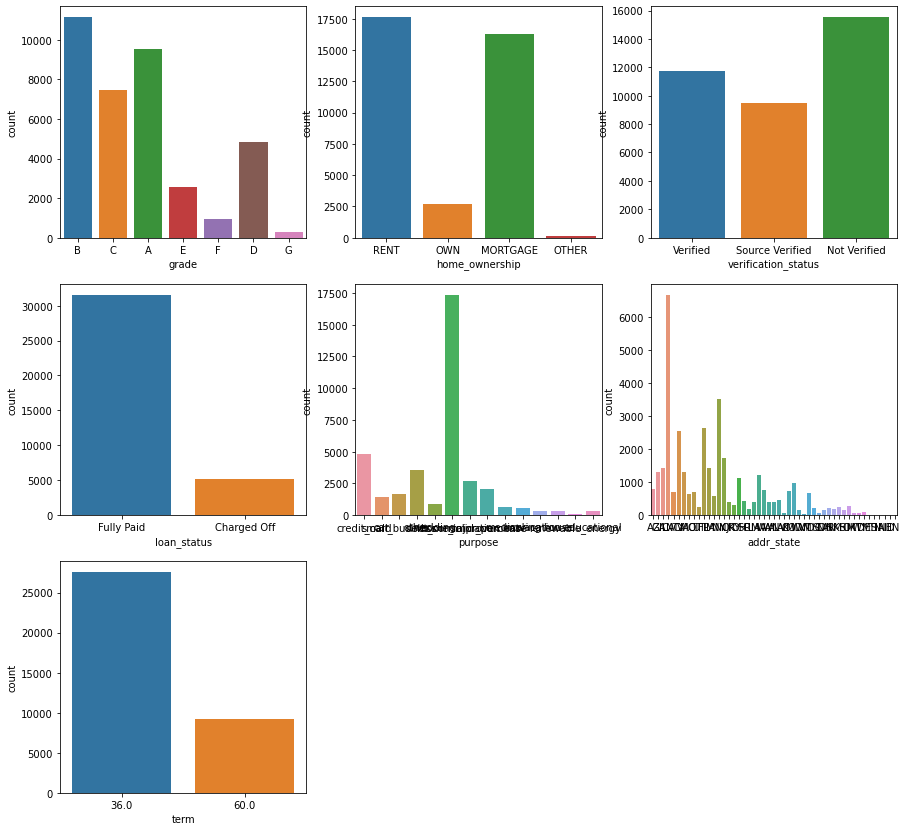

In [37]:
plt.figure(figsize=(15,40))

for i in range(len(variables_catego)):
    plt.subplot(8,3, i + 1)
    sb.countplot(x=variables_catego[i], data=loan)
    plt.xlabel(variables_catego[i])

plt.show()

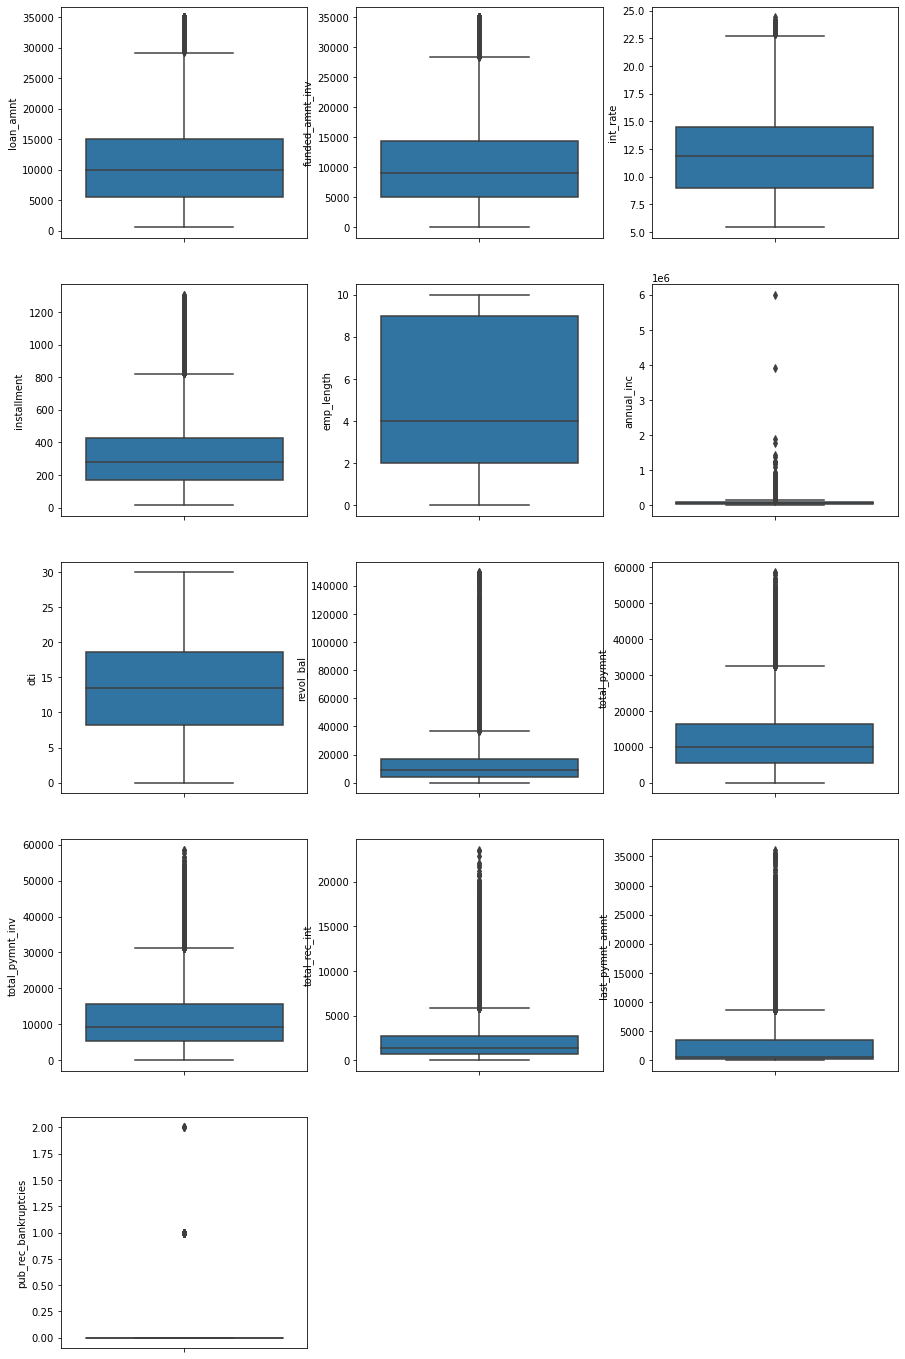

In [38]:
plt.figure(figsize=(15,40))

for i in range(len(variables_number)):
    plt.subplot(8,3, i + 1)
    sb.boxplot(y=variables_number[i], data=loan)
    plt.ylabel(variables_number[i])

plt.show()

# Loan Amount Analysis

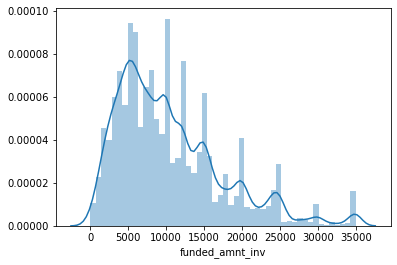

In [39]:
sb.distplot(loan.funded_amnt_inv)
plt.show()

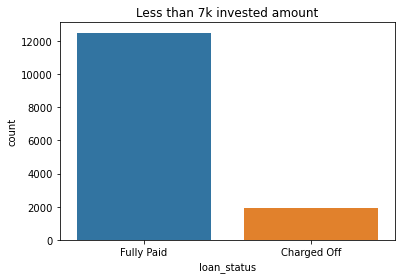

In [102]:
less_than_7k = loan[loan.funded_amnt_inv <= 7000]
greater_than_7k = loan[loan.funded_amnt_inv > 7000]

sb.countplot(x = less_than_7k["loan_status"])
plt.title("Less than 7k invested amount")
plt.show()



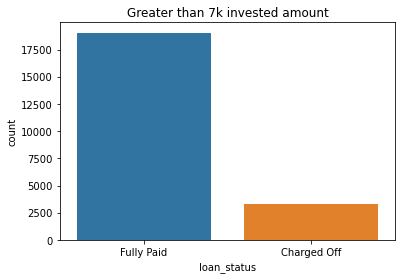

In [103]:
sb.countplot(x = greater_than_7k["loan_status"])
plt.title("Greater than 7k invested amount")
plt.show()


# Income Analysis

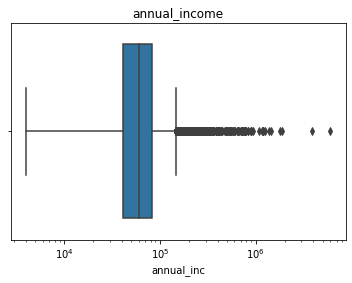

In [104]:
sb.boxplot( x= loan['annual_inc'])
plt.xlabel('annual_inc')
plt.xscale('log')
plt.title('annual_income')
plt.show()

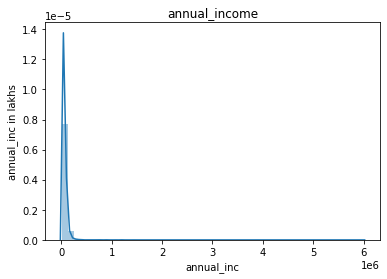

In [107]:
sb.distplot(loan["annual_inc"])
plt.xlabel('annual_inc')
plt.ylabel('annual_inc in lakhs')
plt.title('annual_income')
plt.show()

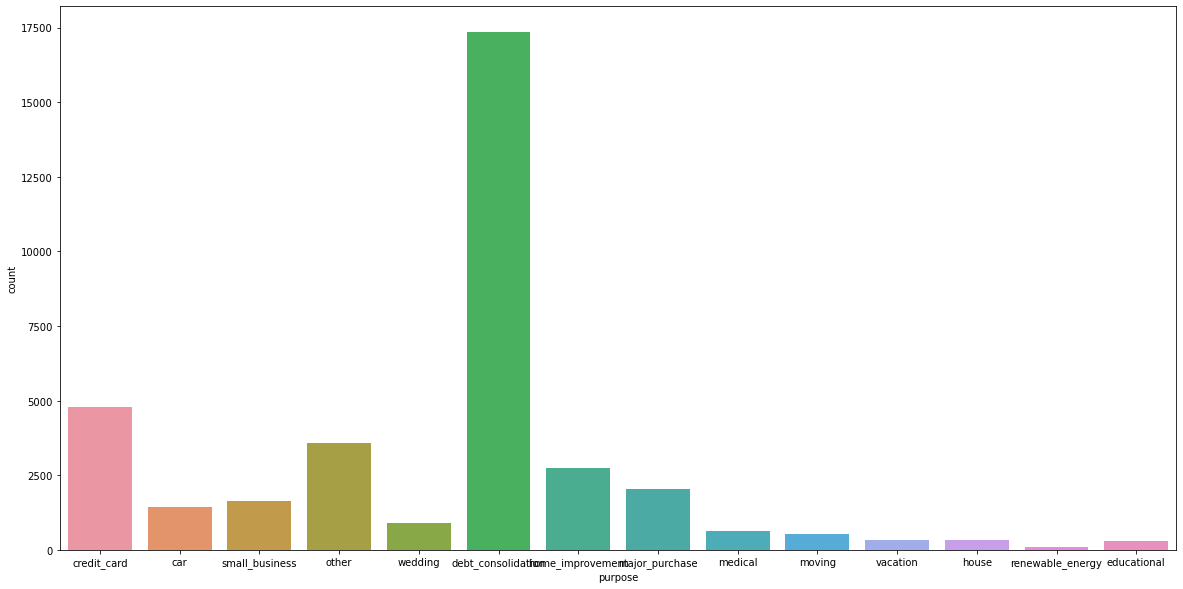

In [40]:
plt.figure(figsize=(20,10))
sb.countplot(x = loan['purpose'])
plt.xlabel('purpose')
plt.show()

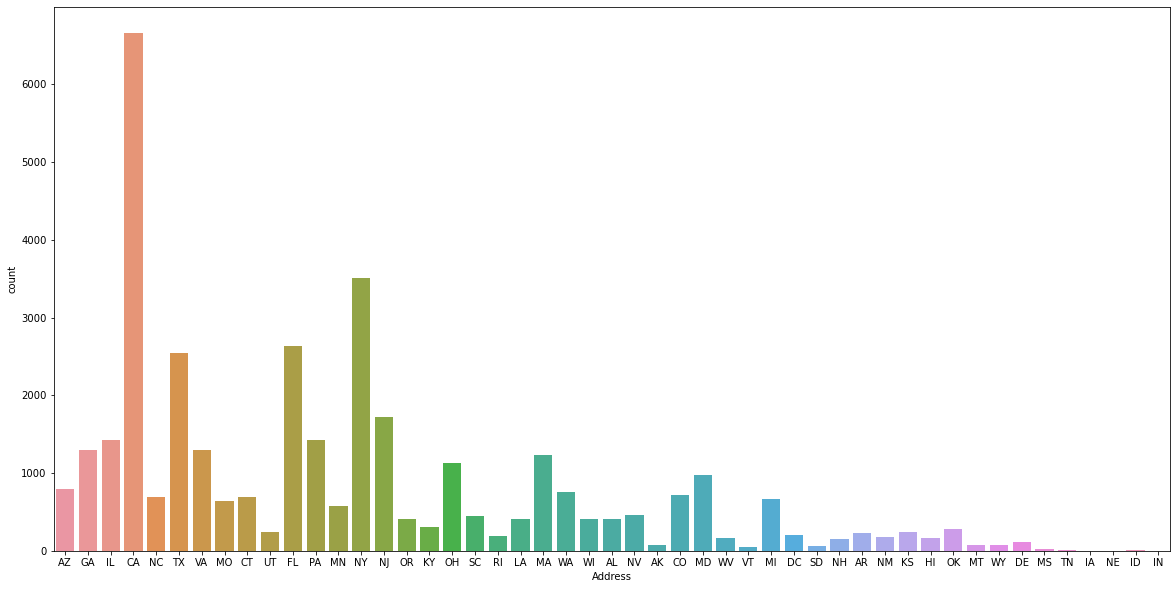

In [41]:
plt.figure(figsize=(20,10))
sb.countplot(x = loan['addr_state'])
plt.xlabel('Address')
plt.show()

### Segmented Analysis

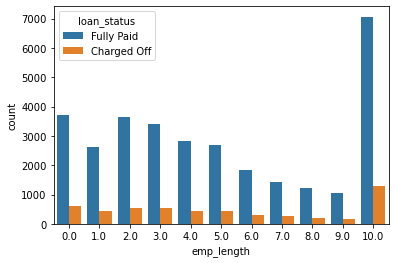

In [42]:
sb.countplot(x='emp_length',hue='loan_status',data=loan)
plt.show()

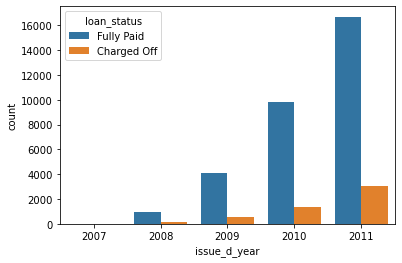

In [44]:
sb.countplot(x='issue_d_year' , hue='loan_status',data=loan)
plt.show()

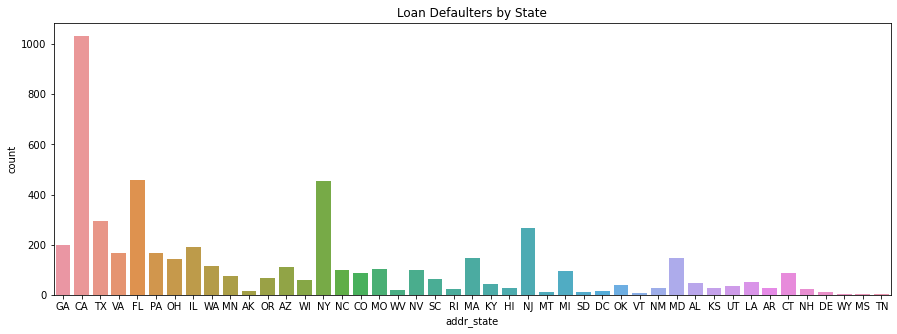

In [114]:
#Loan Defaulters by State
plt.figure(figsize=(15,5))
sb.countplot(x =loan[loan.loan_status=='Charged Off'].addr_state)
plt.title("Loan Defaulters by State")
plt.show()

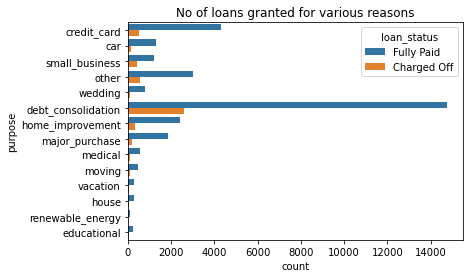

In [115]:
#Loan Purpose
sb.countplot(y='purpose',hue='loan_status',data=loan)
plt.title("No of loans granted for various reasons")
plt.show()

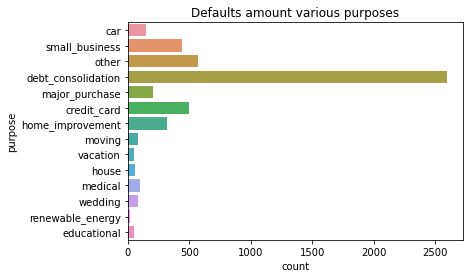

In [116]:
sb.countplot(y=loan[loan.loan_status=='Charged Off'].purpose)
plt.title("Defaults amount various purposes")
plt.show()

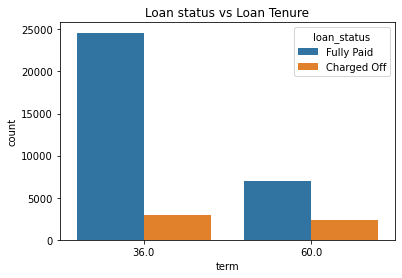

In [117]:
sb.countplot(x='term',hue='loan_status',data=loan)
plt.title("Loan status vs Loan Tenure")
plt.show()

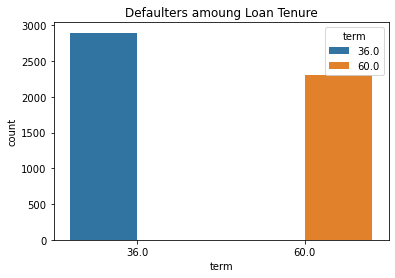

In [118]:
sb.countplot(x=loan[loan.loan_status=='Charged Off'].term,hue=loan.term)
plt.title("Defaulters amoung Loan Tenure")
plt.show()

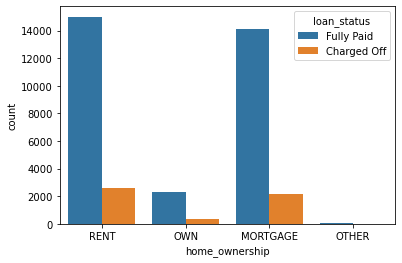

In [49]:
sb.countplot(x = 'home_ownership',hue='loan_status',data=loan)
plt.show()

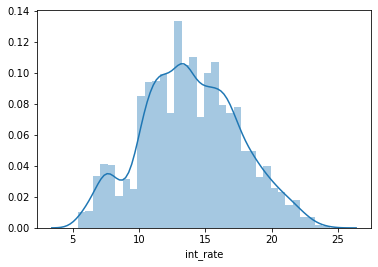

In [61]:
sb.distplot(loan[loan['loan_status']=='Charged Off'].int_rate)
plt.show()

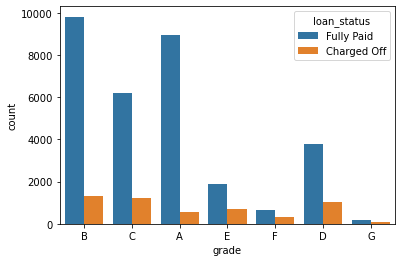

In [54]:
sb.countplot(x='grade',hue='loan_status',data=loan)
plt.show()

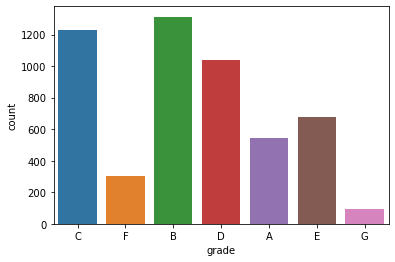

In [55]:
sb.countplot(x=loan[loan['loan_status']=='Charged Off'].grade)
plt.show()

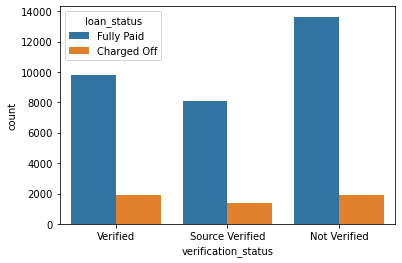

In [56]:
sb.countplot(x='verification_status',hue='loan_status',data=loan)
plt.show()

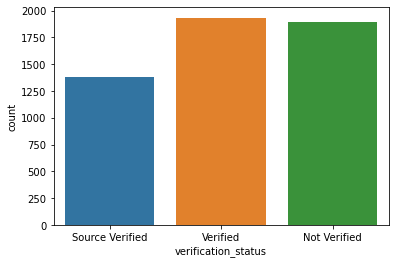

In [57]:
sb.countplot(x=loan[loan.loan_status=='Charged Off'].verification_status)
plt.show()

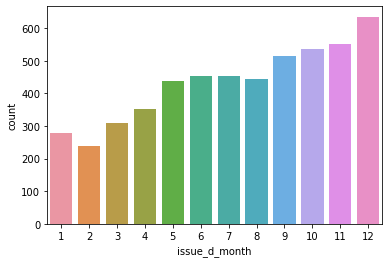

In [58]:
sb.countplot(x=loan[loan.loan_status=='Charged Off'].issue_d_month)
plt.show()

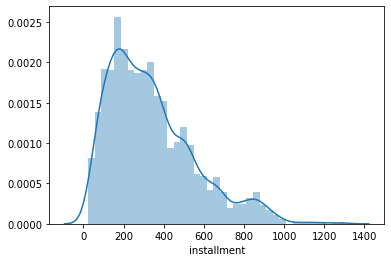

In [62]:
sb.distplot(loan[loan.loan_status=='Charged Off'].installment)
plt.show()

## Bivariate

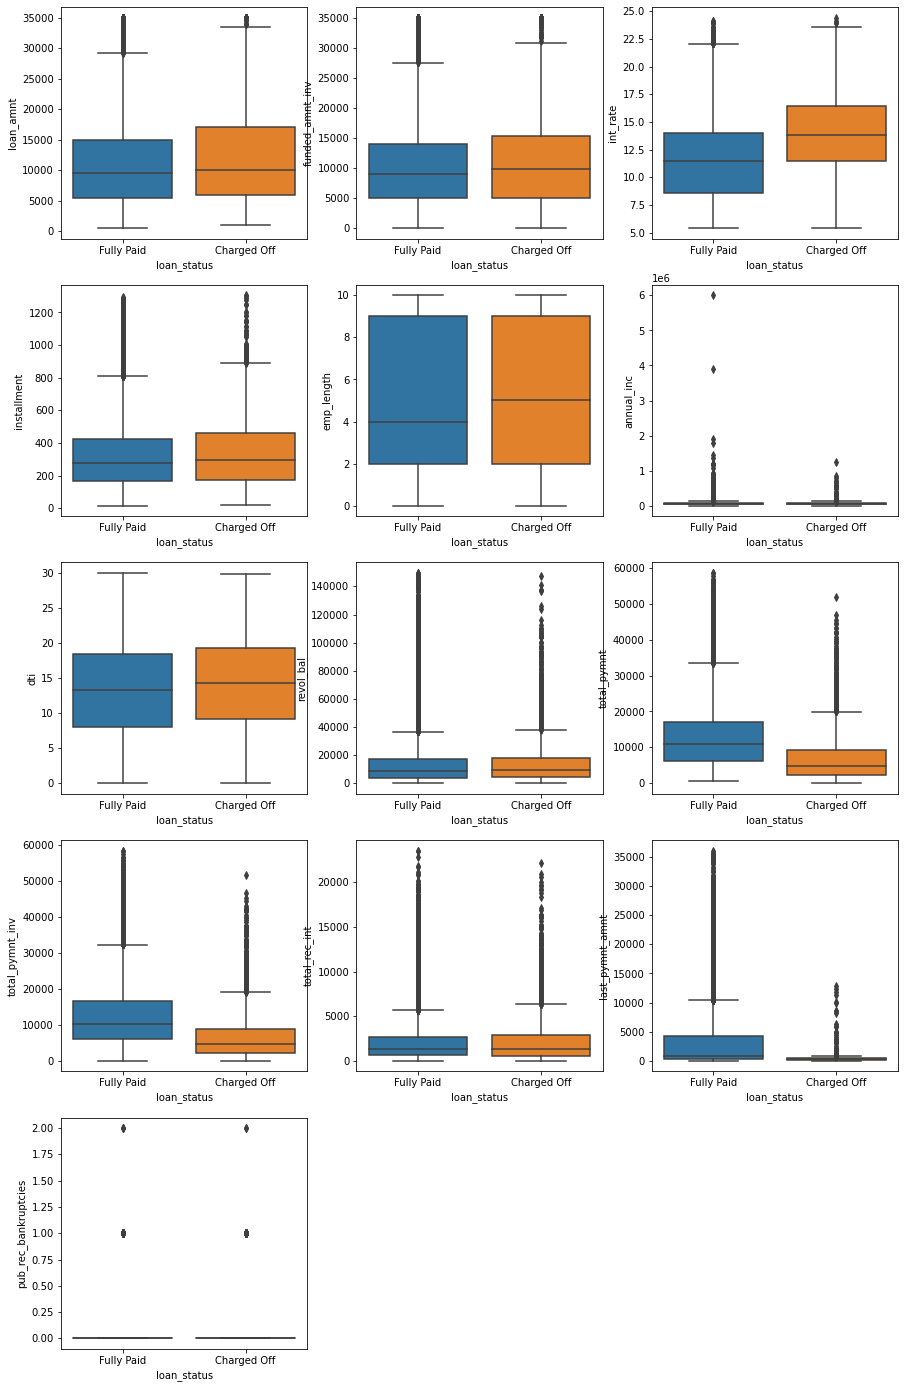

In [63]:
plt.figure(figsize=(15,40))

for i in range(len(variables_number)):
    plt.subplot(8,3, i + 1)
    sb.boxplot(y=variables_number[i], x='loan_status', data=loan)

plt.show()

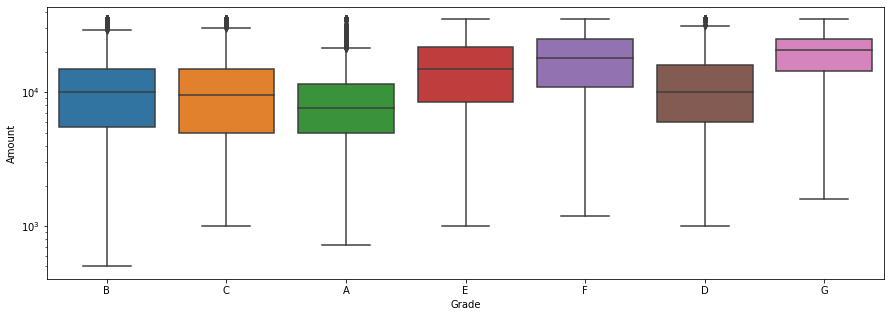

In [64]:
plt.figure(figsize=(15,5))
sb.boxplot(y='loan_amnt', x='grade', data=loan)
plt.yscale('log')
plt.xlabel('Grade')
plt.ylabel('Amount')
plt.show()

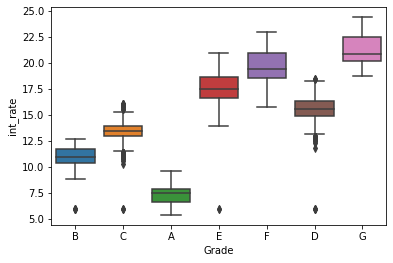

In [65]:
sb.boxplot(y='int_rate', x='grade', data=loan)
plt.xlabel('Grade')
plt.ylabel('int_rate')
plt.show()

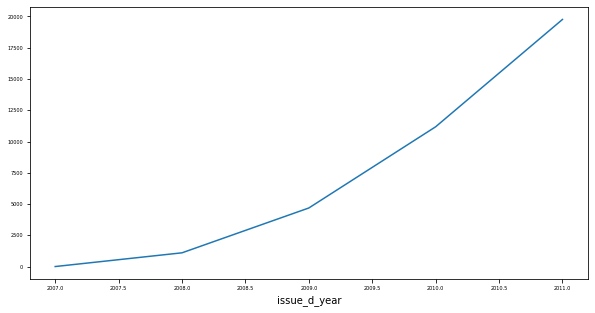

In [66]:
plt.figure(figsize=(10,5))
loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=5 )
plt.show()

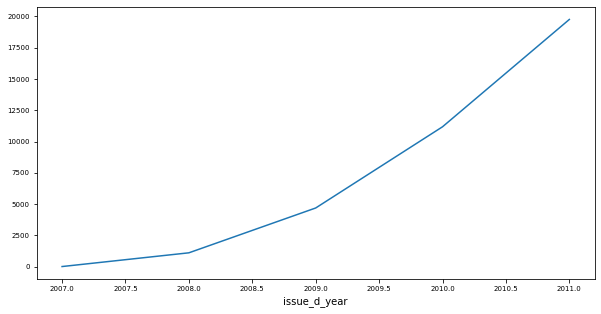

In [67]:

plt.figure(figsize=(10,5))
loan.groupby('issue_d_year').funded_amnt_inv.count().plot(kind='line', fontsize=7)
plt.show()

C:\Users\Rahul\anaconda3\envs\tensor\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


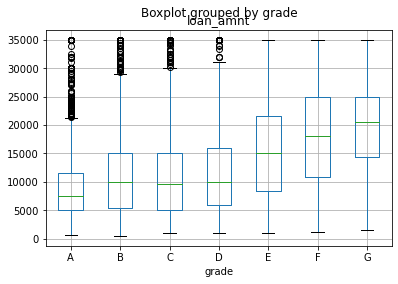

In [68]:
loan.boxplot(column='loan_amnt', by='grade')
plt.show()

C:\Users\Rahul\anaconda3\envs\tensor\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


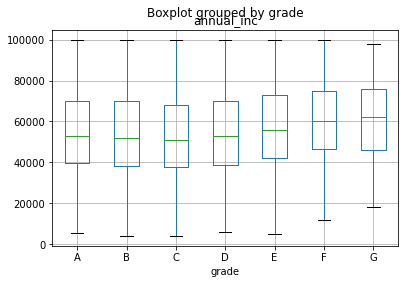

In [69]:
loan[loan.annual_inc<100000].boxplot(column='annual_inc', by='grade')
#plt.yscale('log')
plt.show()

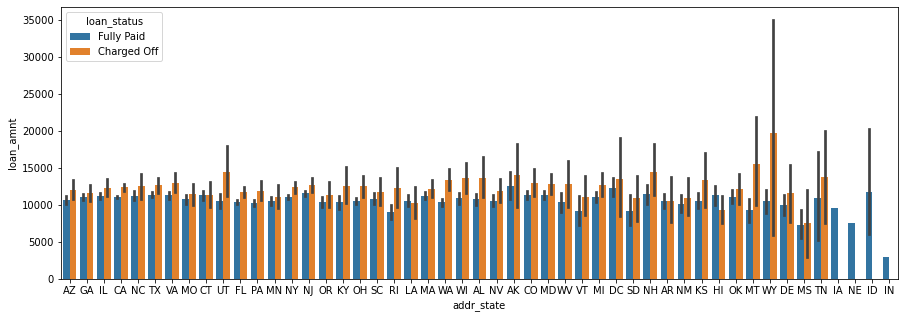

In [70]:
plt.figure(figsize=(15,5))
sb.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan, estimator=np.mean)
plt.show()

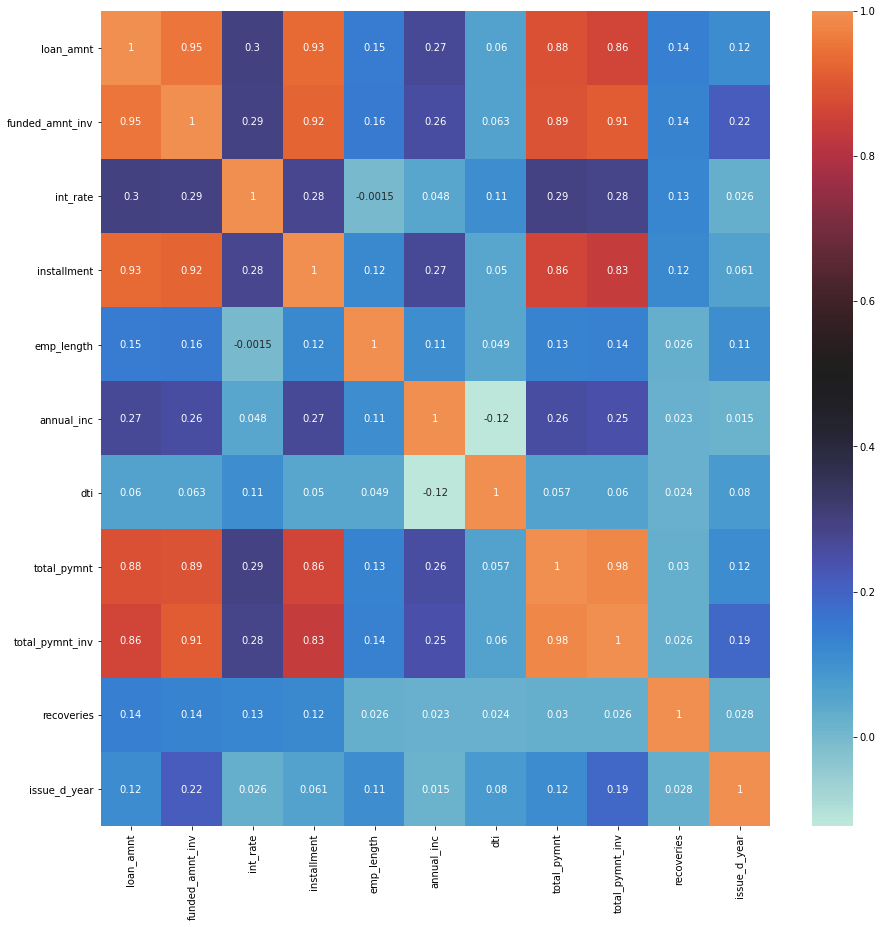

In [71]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'funded_amnt_inv','int_rate','installment','emp_length','annual_inc','dti','total_pymnt','total_pymnt_inv'
          ,'recoveries','issue_d_year']
corr = loan[cont_var].corr()
sb.heatmap(corr, annot=True, center=0.5)

# Multivariant Analysis

C:\Users\Rahul\anaconda3\envs\tensor\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


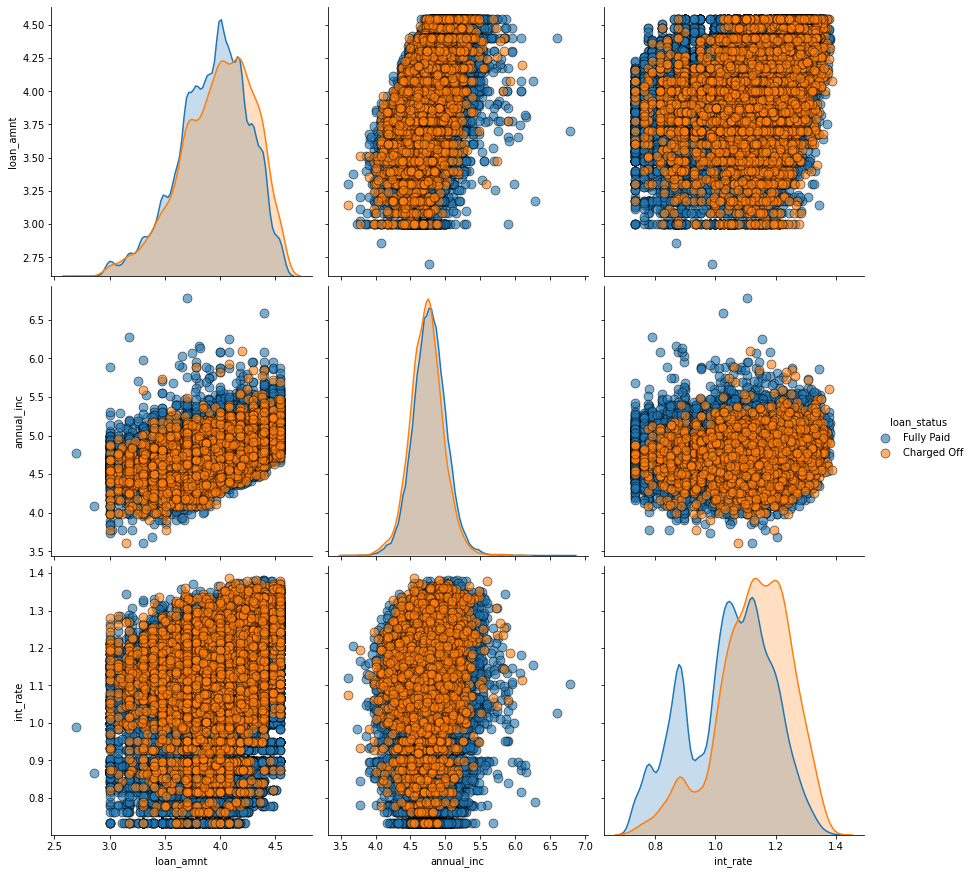

In [74]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.

loan_pair = loan[['loan_amnt', 'annual_inc','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sb.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly.
# increase in number of charged off with increase in year.
# intrest rate is increasing with loan amount increase

In [81]:
loan["loan_status"].value_counts()/len(loan)*100

Fully Paid    85.84
Charged Off   14.16
Name: loan_status, dtype: float64